In [ ]:
import cv2

AttributeError: 'Functional' object has no attribute 'predict_classes'

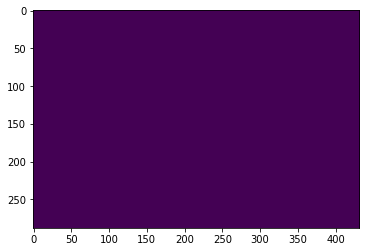

In [1]:
from keras.models import load_model
model = load_model('model/resnet50_model_6_23(denoise(x),e=15,size=(288x432),new_spec).h5')


import matplotlib.pyplot as plt
%matplotlib inline

test1 = plt.imread('C:/Users/jaehee/.keras/datasets/train_data/ingb_new2_spec/test/weather/n3.png')
plt.imshow(test1);

test_num = plt.imread('C:/Users/jaehee/.keras/datasets/train_data/ingb_new2_spec/test/weather/n3.png')
test_num = test_num[:,:,0]
test_num = (test_num > 125) * test_num
test_num = test_num.astype('float32') / 255.

plt.imshow(test_num, interpolation='nearest');

test_num = test_num.reshape((1,288, 432, 1))

print('The Answer is ', model.predict_classes(test_num))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaehee/.keras/datasets/flower_photos')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


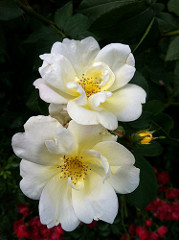

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

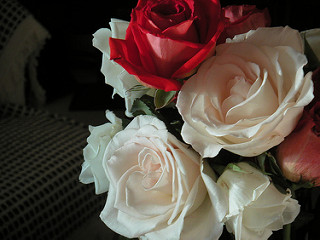

In [5]:
PIL.Image.open(str(roses[1]))

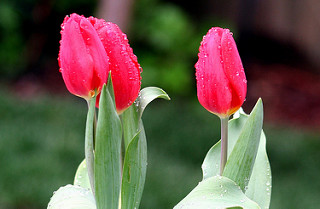

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

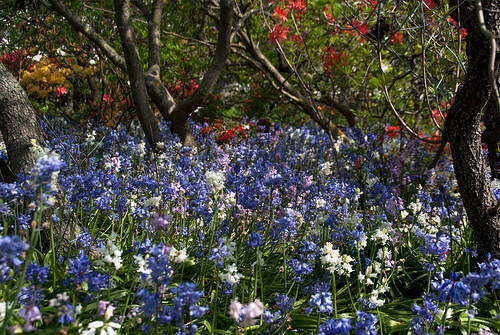

In [7]:
PIL.Image.open(str(tulips[1]))

In [8]:
batch_size = 16
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


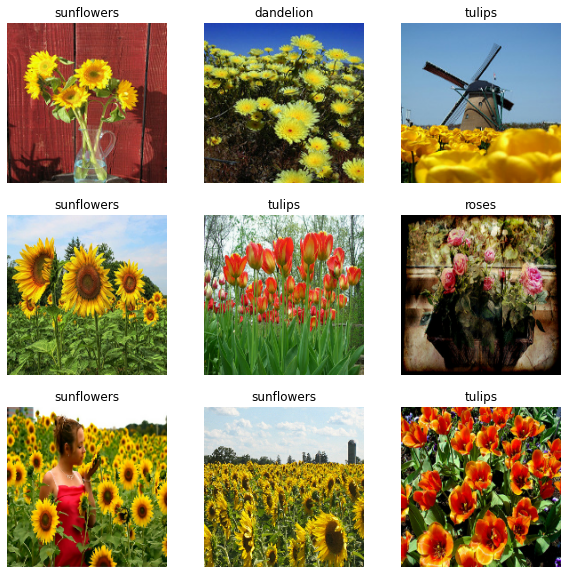

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 180, 180, 3)
(16,)


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99607843


In [17]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
Epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=Epochs
)

Epoch 1/15
184/184 [==============================] - 4s 22ms/step - loss: 1.2218 - accuracy: 0.4935 - val_loss: 1.0317 - val_accuracy: 0.6049
Epoch 2/15
184/184 [==============================] - 2s 12ms/step - loss: 0.9316 - accuracy: 0.6400 - val_loss: 0.9126 - val_accuracy: 0.6444
Epoch 3/15
184/184 [==============================] - 2s 12ms/step - loss: 0.7131 - accuracy: 0.7309 - val_loss: 0.8418 - val_accuracy: 0.6785
Epoch 4/15
184/184 [==============================] - 2s 12ms/step - loss: 0.4641 - accuracy: 0.8260 - val_loss: 0.9548 - val_accuracy: 0.6608
Epoch 5/15
184/184 [==============================] - 2s 12ms/step - loss: 0.2570 - accuracy: 0.9149 - val_loss: 1.2328 - val_accuracy: 0.6594
Epoch 6/15
184/184 [==============================] - 2s 12ms/step - loss: 0.1157 - accuracy: 0.9649 - val_loss: 1.4552 - val_accuracy: 0.6322
Epoch 7/15
184/184 [==============================] - 2s 12ms/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 1.4629 - val_accuracy: 0.6594

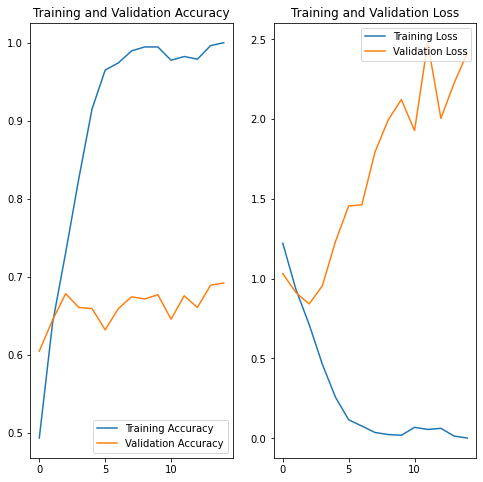

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

tf.Tensor(
[[[[151. 189. 252.]
   [154. 190. 252.]
   [154. 190. 252.]
   ...
   [ 50.  67.  49.]
   [121. 124. 129.]
   [ 24.   7.  15.]]

  [[154. 192. 255.]
   [155. 191. 253.]
   [156. 192. 254.]
   ...
   [ 35.  60.  30.]
   [ 33.  73.  49.]
   [ 30.  70.  44.]]

  [[158. 194. 255.]
   [155. 191. 253.]
   [158. 192. 253.]
   ...
   [ 43.  53.  26.]
   [ 39.  62.  36.]
   [ 35.  57.  34.]]

  ...

  [[124. 166.  54.]
   [123. 164.  60.]
   [173. 209. 113.]
   ...
   [ 47.  61.  48.]
   [ 36.  50.  24.]
   [ 71.  86.  43.]]

  [[169. 219.  98.]
   [129. 176.  64.]
   [116. 160.  49.]
   ...
   [ 50.  63.  46.]
   [ 36.  51.  32.]
   [ 38.  57.  38.]]

  [[112. 168.  33.]
   [125. 176.  55.]
   [114. 162.  44.]
   ...
   [ 43.  56.  36.]
   [ 41.  55.  32.]
   [ 42.  56.  41.]]]], shape=(1, 180, 180, 3), dtype=float32)
This image most likely belongs to sunflowers with a 97.12 percent confidence.


In [5]:
from keras.models import load_model
model = load_model('model/resnet50_model_6_23(denoise(o),e=16,size=(288x432),origin_spec(0.3)-epoch=130).h5')
model.summary()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10427491540525084816,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9977470058517262150
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7046801664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15901906944943694939
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:1c:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3970408538664165732
 physical_device_desc: "device: XLA_GPU device"]

In [9]:
from keras.preprocessing import image
from tensorflow import keras
import tensorflow as tf

img_height = 288#122#128 #288
img_width = 432#187#256 #432
# moring = > C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/morning/unnoisedg (10).png
# traffic => C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/traffic/unnoisedc (1).png
# weather => C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/weather/unnoisedn (1).png

# predict data
# morning => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/morning/unnoisedg1.png
# traffic => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/traffic/unnoisedc1.png
# weather => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/weather/unnoisedn1.png
image_path = 'C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/weather/unnoisedn3.png'
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
#print(img_array)
predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)
print("새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score)))

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node functional_1/conv2d/Conv2D (defined at <ipython-input-7-f0e851bbbdb8>:20) ]] [Op:__inference_predict_function_40665]

Function call stack:
predict_function
